## Preprocess and explore datasets

In [1]:
import pandas as pd
import folium as fol
import geohash2 as gh
import seaborn as sns
import geopandas as gpd
from folium import plugins
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [2]:
ds_path = r'C:\Users\jose.luigi.s.torres\Desktop\aiforsea\traffic_management\data\training.csv'

df = pd.read_csv(ds_path)

In [3]:
######### TEST ON SUBSET FIRST #########
subset_test = pd.DataFrame(df.loc[:100,])
decoded = subset_test.geohash6.apply(lambda x: gh.decode_exactly(x))
subset_test['lat'] = decoded.apply(lambda x: x[0])
subset_test['long'] = decoded.apply(lambda x: x[1])

subset_test['hour'] = subset_test.timestamp.str.split(':').str[0]
subset_test['min'] = subset_test.timestamp.str.split(':').str[1]

geom_test = [Point(xy) for xy in zip(subset_test.lat.astype('float'),subset_test.long.astype('float'))]
gdf_test = gpd.GeoDataFrame(subset_test,geometry=geom_test)

subset_test.drop(['geohash6'],axis=1,inplace=True)

In [4]:
# preprocess coordinates
decoded = df.geohash6.apply(lambda x: gh.decode_exactly(x))
df['lat'] = decoded.apply(lambda x: x[0])
df['long'] = decoded.apply(lambda x: x[1])

# convert to geodataframe
geom = [Point(xy) for xy in zip(df.lat.astype('float'),df.long.astype('float'))]
gdf = gpd.GeoDataFrame(df,geometry=geom)

In [5]:
gdf['hour'] = gdf.timestamp.str.split(':').str[0]
gdf['min'] = gdf.timestamp.str.split(':').str[1]

gdf['hour'] = gdf['hour'].astype('int')
gdf['min'] = gdf['min'].astype('int')


gdf.drop(['geohash6',],axis=1,inplace=True)

C:\Users\jose.luigi.s.torres\.conda\envs\aiforsea\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


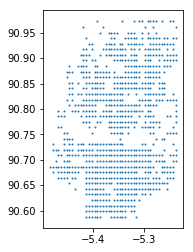

In [6]:
import pysal as ps

# select 1 snapshot in day 1
snapshot = gdf.query("day==1&timestamp=='10:15'")
snapshot.plot(markersize=1)

In [7]:
w = ps.weights.Distance.KNN.from_dataframe(snapshot,k=3,geom_col="geometry")

In [13]:
W = ps.higher_order(w,0)

C:\Users\jose.luigi.s.torres\.conda\envs\aiforsea\lib\site-packages\pysal\weights\weights.py:189: UserWarning: There are 863 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
C:\Users\jose.luigi.s.torres\.conda\envs\aiforsea\lib\site-packages\pysal\weights\weights.py:190: UserWarning: Island ids: 927, 13598, 15272, 19929, 28509, 28986, 38117, 38224, 55239, 57233, 64565, 65732, 72814, 86572, 91560, 108832, 114512, 114922, 117946, 121969, 123064, 127344, 129142, 132899, 132990, 134645, 134875, 136088, 144017, 145893, 149380, 154052, 158162, 165700, 166609, 179897, 183192, 208481, 212343, 215784, 221094, 233360, 240030, 251915, 252435, 257694, 268669, 270880, 273303, 275049, 283170, 291192, 304608, 338571, 342826, 345282, 347833, 352654, 353839, 354784, 357507, 358586, 359329, 360238, 366261, 366826, 370440, 372500, 378294, 378702, 387193, 388704, 392628, 394398, 395628, 399616, 400617, 404346, 405774, 409891, 421292, 430689, 441199, 462347, 475606, 

In [15]:
W.weights

{927: [],
 13598: [],
 15272: [],
 19929: [],
 28509: [],
 28986: [],
 38117: [],
 38224: [],
 55239: [],
 57233: [],
 64565: [],
 65732: [],
 72814: [],
 86572: [],
 91560: [],
 108832: [],
 114512: [],
 114922: [],
 117946: [],
 121969: [],
 123064: [],
 127344: [],
 129142: [],
 132899: [],
 132990: [],
 134645: [],
 134875: [],
 136088: [],
 144017: [],
 145893: [],
 149380: [],
 154052: [],
 158162: [],
 165700: [],
 166609: [],
 179897: [],
 183192: [],
 208481: [],
 212343: [],
 215784: [],
 221094: [],
 233360: [],
 240030: [],
 251915: [],
 252435: [],
 257694: [],
 268669: [],
 270880: [],
 273303: [],
 275049: [],
 283170: [],
 291192: [],
 304608: [],
 338571: [],
 342826: [],
 345282: [],
 347833: [],
 352654: [],
 353839: [],
 354784: [],
 357507: [],
 358586: [],
 359329: [],
 360238: [],
 366261: [],
 366826: [],
 370440: [],
 372500: [],
 378294: [],
 378702: [],
 387193: [],
 388704: [],
 392628: [],
 394398: [],
 395628: [],
 399616: [],
 400617: [],
 404346: [],
 40

In [9]:
splag = ps.weights.lag_spatial(w,snapshot.demand.values)

In [ ]:
splag.shape